## Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 
- Draw the inferences from the clusters obtained.

## Data Description:
- Murder -- Muder rates in different places of United States
- Assualt- Assualt rate in different places of United States
- UrbanPop - urban population in different places of United States
- Rape - Rape rate in different places of United States

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('crime_data.csv',index_col=0)

In [3]:
#Top few records of the dataset
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
#Top few records of the dataset
df.tail()

,Murder,Assault,UrbanPop,Rape
Virginia,8.5,156,63,20.7
Washington,4.0,145,73,26.2
West Virginia,5.7,81,39,9.3
Wisconsin,2.6,53,66,10.8
Wyoming,6.8,161,60,15.6


In [5]:
#No of columns(features/variables) and rows(records)
df.shape

(50, 4)

In [6]:
#Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [7]:
#data types
df.dtypes

Murder      float64
Assault       int64
UrbanPop      int64
Rape        float64
dtype: object

# Duplicates

In [8]:
df[df.duplicated()].shape

(0, 4)

In [9]:
df[df.duplicated()]

,Murder,Assault,UrbanPop,Rape


In [10]:
data_cleaned1=df.iloc[:]

# Outlier Detection

<AxesSubplot:xlabel='Murder', ylabel='Count'>

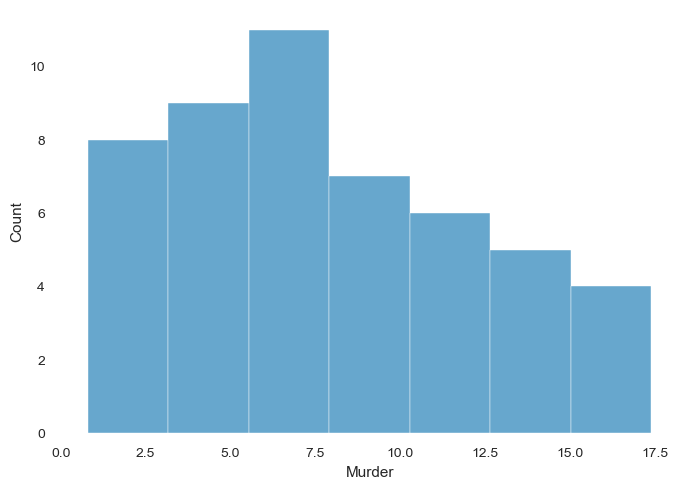

In [11]:
import seaborn as sns
sns.histplot(data_cleaned1.iloc[:,0])

<AxesSubplot:xlabel='Assault', ylabel='Count'>

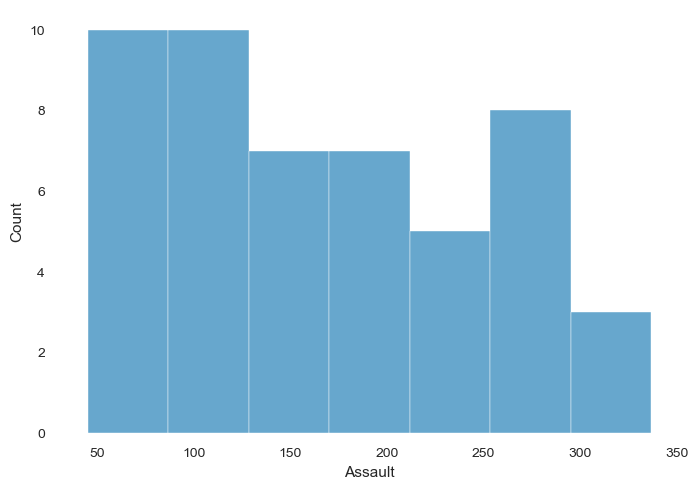

In [12]:
sns.histplot(data_cleaned1.iloc[:,1])

<AxesSubplot:xlabel='UrbanPop', ylabel='Count'>

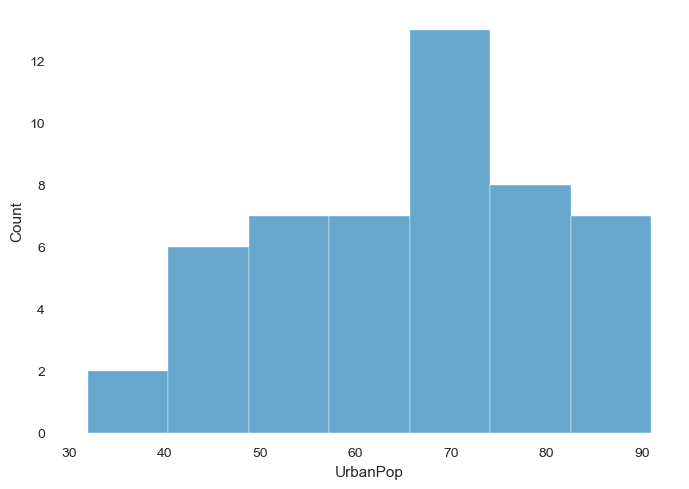

In [13]:
sns.histplot(data_cleaned1.iloc[:,2])

<AxesSubplot:xlabel='Rape', ylabel='Count'>

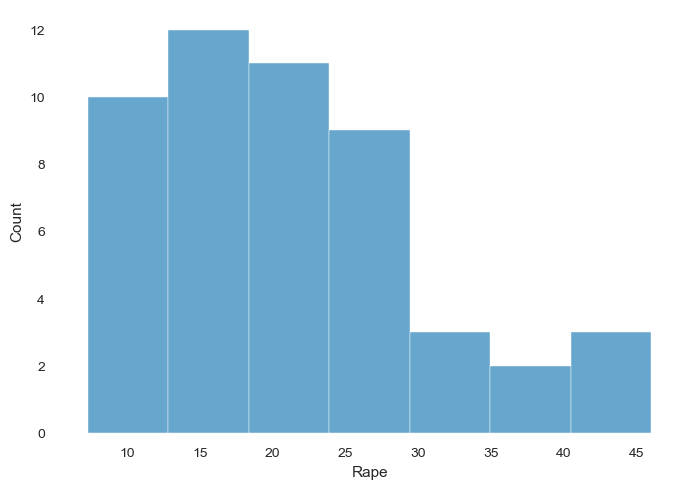

In [14]:
sns.histplot(data_cleaned1.iloc[:,3])

In [15]:
data_cleaned1.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


# Missing Values and Imputation

<AxesSubplot:>

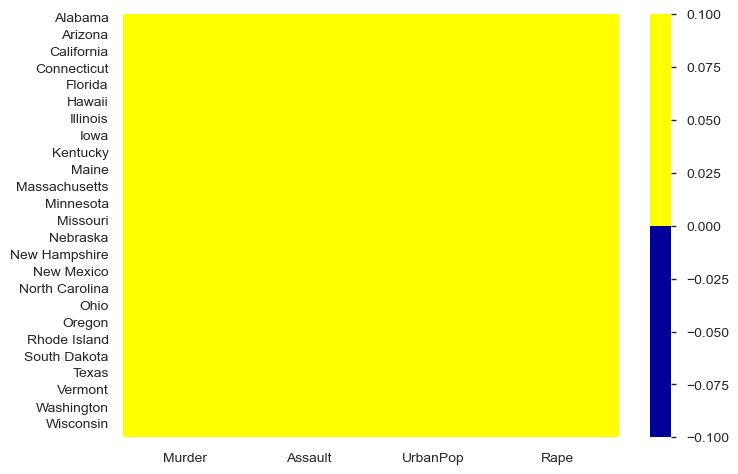

In [16]:
cols = data_cleaned1.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned1[cols].isnull(),
            cmap=sns.color_palette(colours))

# Normalization of the data

In [17]:
from sklearn.preprocessing import MinMaxScaler
from numpy import set_printoptions

In [18]:
array = data_cleaned1.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:12])
#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


[[0.75 0.65 0.44 0.36]
 [0.55 0.75 0.27 0.96]
 [0.44 0.85 0.81 0.61]
 [0.48 0.5  0.31 0.32]
 [0.49 0.79 1.   0.86]]


In [19]:
scaleddf=pd.DataFrame(data=rescaledX,columns=data_cleaned1.columns)
scaleddf

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


# K-Means

# Selecting Hyper Parameter = K-Value using Elbow Plot

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# From above elbow plot we set K-value as 5

In [21]:
clusters_new = KMeans(4, random_state=30)
clusters_new.fit(scaleddf)

KMeans(n_clusters=4, random_state=30)

In [22]:
clusters_new.labels_

array([3, 2, 2, 3, 2, 2, 1, 1, 2, 3, 1, 0, 2, 1, 0, 1, 0, 3, 0, 2, 1, 2,
       0, 3, 2, 0, 0, 2, 0, 1, 2, 2, 3, 0, 1, 1, 1, 1, 1, 3, 0, 3, 2, 1,
       0, 1, 1, 0, 0, 1])

In [23]:
data_cleaned2=data_cleaned1.iloc[:]
data_cleaned2['clusterid_new'] = clusters_new.labels_

In [24]:
data_cleaned2.groupby('clusterid_new').agg(['mean']).reset_index()

,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923
1,1,5.656250,138.875000,73.875000,18.781250
2,2,10.815385,257.384615,76.000000,33.192308
3,3,13.937500,243.625000,53.750000,21.412500


In [25]:
# Split-out validation dataset
array = data_cleaned2.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,-1]

[Text(0, 0, '8'), Text(0, 0, '13'), Text(0, 0, '13'), Text(0, 0, '16')]

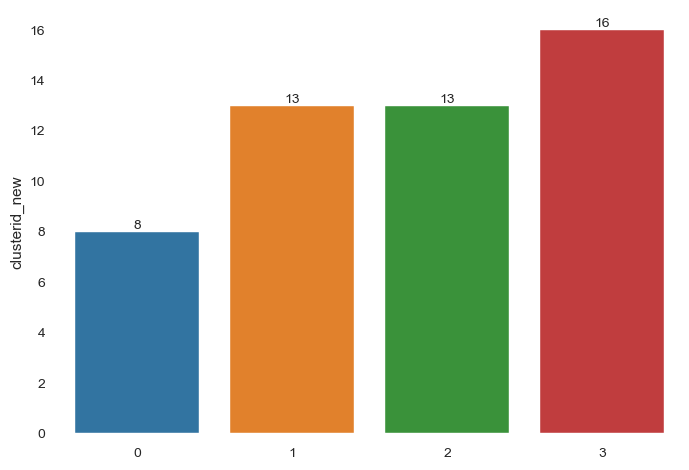

In [26]:
ax=sns.barplot(x=data_cleaned2.iloc[:,-1].unique(),y=data_cleaned2.iloc[:,-1].value_counts())
ax.bar_label(ax.containers[0])

# DBSCAN

In [27]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [28]:
data_standarized=StandardScaler().fit_transform(data_cleaned1)
data_standarized=pd.DataFrame(data_standarized,columns=data_cleaned1.columns)
data_standarized

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


# estimating DBSCAN’s two parameters:
- Minimum samples (“MinPts”): the fewest number of points required to form a cluster
- ε (epsilon or “eps”): the maximum distance two points can be from one another while still belonging to the same cluster

- As a rule of thumb, MinPts= 2·D can be used, but it may be necessary to choose larger values for very large data, for noisy data, or for data that contains many duplicates.
- After you select your MinPts value, you can move on to determining ε.
- The average k-distances are then plotted in ascending order on a k-distance graph. You’ll find the optimal value for ε at the point of maximum curvature (i.e. where the graph has the greatest slope).

In [29]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(data_standarized)
distances, indices = nbrs.kneighbors(data_standarized)

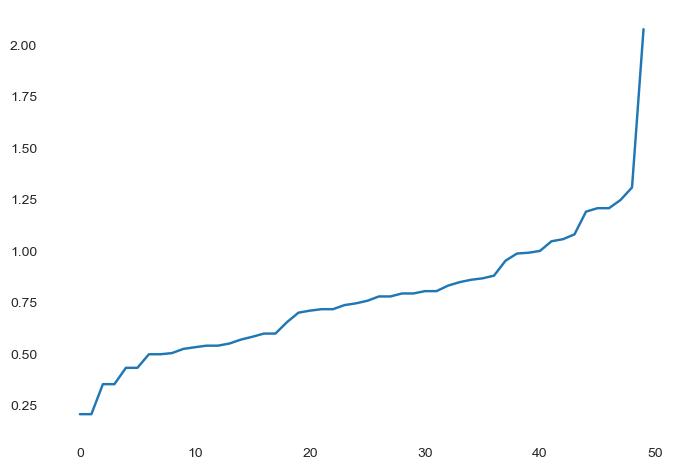

In [30]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [31]:
dbscan = DBSCAN(eps=1.0, min_samples=4)
dbscan.fit(data_standarized)

DBSCAN(eps=1.0, min_samples=4)

In [32]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [33]:
data_cleaned3=data_cleaned1.iloc[:]
data_cleaned3['clusterid_new'] = dbscan.labels_

In [34]:
data_cleaned3

,Murder,Assault,UrbanPop,Rape,clusterid_new
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,-1
Arizona,8.1,294,80,31.0,-1
Arkansas,8.8,190,50,19.5,-1
California,9.0,276,91,40.6,-1
Colorado,7.9,204,78,38.7,-1
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,-1
Florida,15.4,335,80,31.9,-1
Georgia,17.4,211,60,25.8,-1


In [35]:
data_cleaned3.groupby('clusterid_new').agg(['mean','count']).reset_index()

clusterid_new     Murder           Assault         UrbanPop        \
                      mean count        mean count       mean count   
0            -1  11.005556    18  247.166667    18  70.666667    18   
1             0  14.050000     4  238.000000     4  57.750000     4   
2             1   4.825000    28  112.035714    28  63.357143    28   

        Rape        
        mean count  
0  28.766667    18  
1  23.200000     4  
2  16.107143    28

In [36]:
# Split-out validation dataset
array = data_cleaned3.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,-1]

[Text(0, 0, '18'), Text(0, 0, '28'), Text(0, 0, '4')]

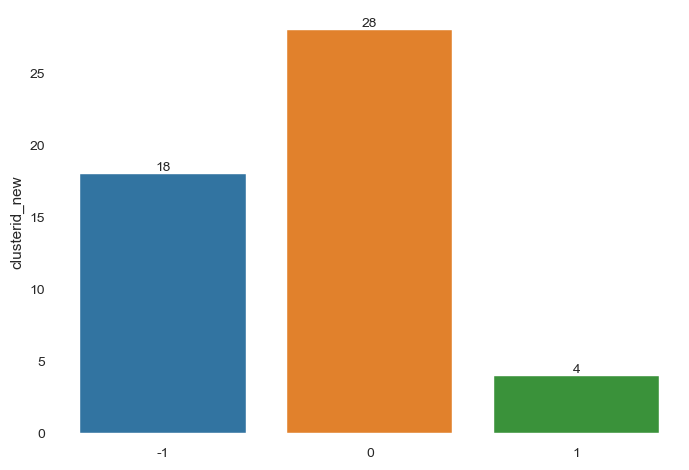

In [37]:
ax=sns.barplot(x=data_cleaned3.iloc[:,-1].unique(),y=data_cleaned3.iloc[:,-1].value_counts())
ax.bar_label(ax.containers[0])

# Hierarchical Clustering

In [38]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

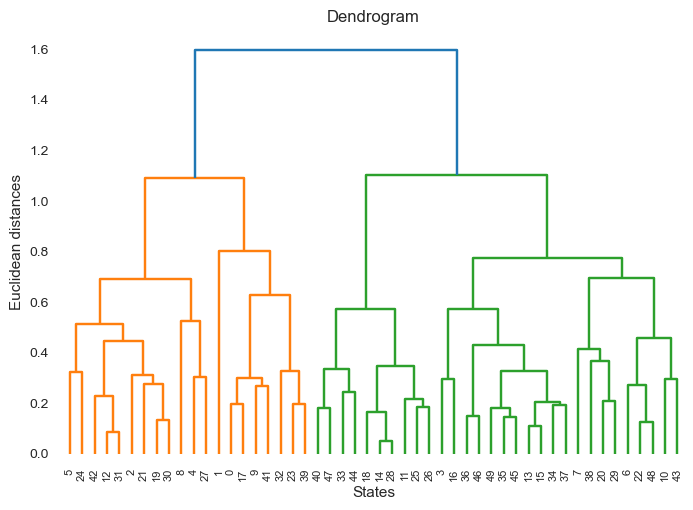

In [39]:
dendrogram = sch.dendrogram(sch.linkage(scaleddf, 'complete'))
plt.title('Dendrogram')
plt.xlabel('States')
plt.ylabel('Euclidean distances')
plt.show()

In [40]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
model

AgglomerativeClustering(linkage='complete', n_clusters=4)

In [41]:
y=pd.DataFrame(model.fit_predict(scaleddf),columns=['clusterid_new'])
y['clusterid_new'].value_counts()

1    20
3    12
2    10
0     8
Name: clusterid_new, dtype: int64

In [42]:
data_cleaned4=data_cleaned1.iloc[:]
data_cleaned4['clusterid_new'] = model.labels_
data_cleaned4

,Murder,Assault,UrbanPop,Rape,clusterid_new
Alabama,13.2,236,58,21.2,0
Alaska,10.0,263,48,44.5,0
Arizona,8.1,294,80,31.0,3
Arkansas,8.8,190,50,19.5,1
California,9.0,276,91,40.6,3
Colorado,7.9,204,78,38.7,3
Connecticut,3.3,110,77,11.1,1
Delaware,5.9,238,72,15.8,1
Florida,15.4,335,80,31.9,3
Georgia,17.4,211,60,25.8,0


In [43]:
# Split-out validation dataset
array = data_cleaned4.values
# separate array into input and output components
X = array[:,0:11]
Y = array[:,-1]

[Text(0, 0, '20'), Text(0, 0, '10'), Text(0, 0, '8'), Text(0, 0, '12')]

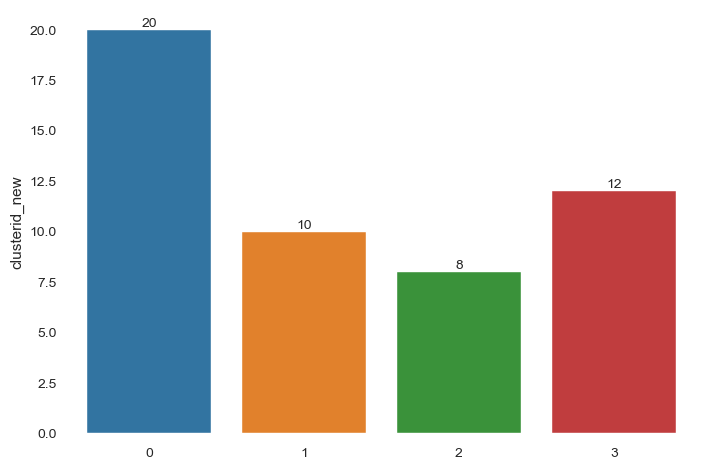

In [44]:
ax=sns.barplot(x=data_cleaned4.iloc[:,-1].unique(),y=data_cleaned4.iloc[:,-1].value_counts())
ax.bar_label(ax.containers[0])

In [45]:
data_cleaned4.groupby('clusterid_new').agg(['mean','count']).reset_index()

clusterid_new     Murder           Assault         UrbanPop           Rape  \
                      mean count        mean count       mean count     mean   
0             0  14.087500     8  252.750000     8  53.500000     8  24.5375   
1             1   5.715000    20  132.300000    20  70.800000    20  18.1000   
2             2   3.180000    10   78.700000    10  49.300000    10  11.6300   
3             3  10.883333    12  256.916667    12  78.333333    12  32.2500   

         
  count  
0     8  
1    20  
2    10  
3    12